In [37]:
import numpy as np
path = 'F:\\UCSD\\AI\\6\\'
f = open(path+'emissionMatrix.txt', 'r')
b = np.array([[float(j) for j in i.split()] for i in f.readlines()])
logb = np.log(b)
f.close()

In [38]:
f = open(path+'transitionMatrix.txt', 'r')
a = np.array([[float(j) for j in i.split()] for i in f.readlines()])
loga = np.log(a)
f.close()

In [39]:
f = open(path+'observations.txt', 'r')
i = f.readline()
o = np.array([int(j) for j in i.split()])
f.close()

In [40]:
f = open(path+'initialStateDistribution.txt', 'r')
pi = np.array([float(i.split()[0]) for i in f.readlines()])
logpi = np.log(pi)
f.close()

In [55]:
n = pi.shape[0]
T = o.shape[0]
l = np.zeros((n,T))
phi = np.zeros((n,T))

l[:,0] = logpi + logb[:,o[0]]
    
for t in xrange(1,T):
    for j in xrange(n):
        l[j][t] = np.max(l[:,t-1] + loga[:,j])
        phi[j][t] = np.argmax(l[:,t-1] + loga[:,j])
    l[:,t] += logb[:,o[t]]

In [67]:
s = np.zeros(T)
s[T-1] = np.argmax(l[:,T-1])

for t in xrange(T-2, -1, -1):
    s[t] = phi[int(s[t+1])][t+1]
    
s = s+1

In [78]:
result = []
decoded = []
prev = -1
import string
alphabets = string.lowercase

for t in xrange(T):
    if s[t] == prev:
        continue
    else:
        prev = int(s[t])
        result.append(prev)
        decoded.append(alphabets[prev-1])

In [80]:
print result
print ''.join(decoded)

[20, 5, 1, 13, 9, 18, 15, 14, 13, 1, 14, 15, 18, 20, 5, 1, 13, 3, 1, 16]
teamironmanorteamcap


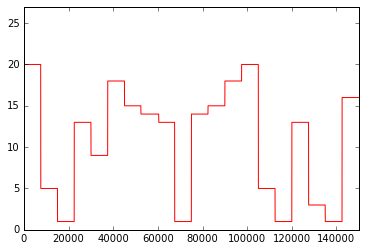

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(s)), s, 'r')
plt.axis([0, len(s), 0, 27])
plt.show()